In [1]:
#TABLA 1 ZOTENKO
import numpy as np
import matplotlib.pylab as plt
import networkx as nx
import pandas as pd

def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data
    
#grafico de nodos
def graficar(archive):

    data=ldata(archive)
    g = nx.Graph ()
    g = g.to_undirected()
    
    for i in range (len(data)):
        g.add_nodes_from (data[i])
        g.add_edge (data[i][0],data[i][1])
        
    nx.draw(g,node_size = 40,with_labels=False, font_weight='bold')
    plt.show()

# graficar('tc02Data/yeast_AP-MS.txt')    
# graficar('tc02Data/yeast_LIT.txt')
# graficar('tc02Data/yeast_Y2H.txt')

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
#2) Tabla 1
def data_de_red(archive):

    RTA=[]
    data=ldata(archive)
    g = nx.Graph ()
    g = g.to_undirected()

    for i in range (len(data)):
        g.add_nodes_from (data[i])
        g.add_edge (data[i][0],data[i][1])

    #Número de nodos
    N=g.number_of_nodes()

    #Número de enlaces
    L=g.number_of_edges()

    #Grado medio de la red
    k=[]
    for node in g.nodes:
        k.append(g.degree(node)) #El comando g.degree() calcula el grado como 
                                #si la red fuese no-dirigida
    km = sum(k)/len(k)  #valor medio de k  
    
    #Coeficiente de clustering

    Nodo_gnodo_vecino_gvecino_vecinossegundos=[] #Creo una lista con los nodos,  
    for nodo in g.nodes():                      #sus grados, sus vecinos, los 
        v=[]                                    #grados de sus vecinos y sus 
        for vecino in g.neighbors(nodo):        #vecinos segundos
            v2=[]
            for vecino2 in g.neighbors(vecino):
                v2.append(vecino2)
            gv=len(v2)
            v.append([vecino,gv,v2])
        gn=len(v)
        Nodo_gnodo_vecino_gvecino_vecinossegundos.append([nodo,gn,v])

    #Ahora calculo el <Ci>
    t=-1
    C=np.zeros(len(g.nodes()))

    #Calculo la cantidad de enlaces entre vecinos
    for n in Nodo_gnodo_vecino_gvecino_vecinossegundos:
        E = 0
        t=t+1
        for i in range(len(n[2])):
            for j in range(len(n[2])):
                for k in range(len(n[2][i][2])):
                    if n[2][i][2][k] == n[2][j][0]:
                        E = E + 1 #Cuento los enlaces entre vecinos del nodo n. 
                                  #Haciendo esto, se cuentan dos veces.

        if n[1] > 1: #Si el grado es menor o igual a 1, entonces el coeficiente 
                     #de clustering es nulo
            C[t]=E/(n[1]*(n[1]-1)) #Como es una red no dirigida, debería 
                                   #multiplicar por dos, pero ese factor esta 
                                   #contemplado en el numero de enlaces 
                                   #calculados dado que se repiten dos veces

    CPromedio=sum(C)/len(C)

    RTA.append([N, L, km, CPromedio])

    return RTA

AP = data_de_red('tc02Data/yeast_AP-MS.txt')
LIT = data_de_red('tc02Data/yeast_LIT.txt')
Y2H = data_de_red('tc02Data/yeast_Y2H.txt')
LIT_REGULY = data_de_red('tc02Data/yeast_LIT_Reguly.txt')

#TABLA
tabla_red = pd.DataFrame ({"Redes":["AP_MS","LIT","Y2H","LIT_Reguly"],
                           "Numero de Nodos":[AP[0][0],LIT[0][0],Y2H[0][0],LIT_REGULY[0][0]],
                           "Numero de Enlaces":[AP[0][1],LIT[0][1],Y2H[0][1],LIT_REGULY[0][1]],
                           "Grado Medio":[AP[0][2],LIT[0][2],Y2H[0][2],LIT_REGULY[0][2]],
                           "<Ci>":[AP[0][3],LIT[0][3],Y2H[0][3],LIT_REGULY[0][3]]})
print (tabla_red)

       <Ci>  Grado Medio  Numero de Enlaces  Numero de Nodos       Redes
0  0.554636    11.183724               9070             1622       AP_MS
1  0.339892     3.808594               2925             1536         LIT
2  0.153985     2.903865               2930             2018         Y2H
3  0.104464     1.940599              11859            12222  LIT_Reguly


In [3]:
#TABLA 2 ZOTENKO
#Creo una funcion que agarre los enlaces de cada nodo y los compare con las otras redes

#Adapto la tabla LIT_REGULY para poder trabajar con el mismo codigo
LIT_REGULYY = ldata ('tc02Data/yeast_LIT_Reguly.txt')
LIT_REGULYYY = []
for i in range(1,len(LIT_REGULYY)):
    LIT_REGULYYY.append([LIT_REGULYY[i][0],LIT_REGULYY[i][1]])
#print(LIT_REGULYYY)

In [4]:
#2) Tabla2
def invertir(lista):
    rlista=[]
    for i in range(len(lista)):
        rlista.append(lista[len(lista)-1-i])
    return rlista

APP = ldata ('tc02Data/yeast_AP-MS.txt')
LITT = ldata ('tc02Data/yeast_LIT.txt')
Y2HH = ldata ('tc02Data/yeast_Y2H.txt')
LIT_REGULYY = ldata ('tc02Data/yeast_LIT_Reguly.txt')

LIT_REGULYYY = []
for i in range(1,len(LIT_REGULYY)):
    LIT_REGULYYY.append([LIT_REGULYY[i][0],LIT_REGULYY[i][1]])


def overlap(data1,data2,data3,data4):
    datas = [data1,data2,data3,data4]
    overlap_list = []
    for i in range(len(datas)):
        i_list=[]
        for j in range(i+1,len(datas)):
            count = 0
            for l in range (len(datas[i])):
                if datas[i][l] in datas[j]:
                    count = count + 1
                else:
                    invert = invertir(datas[i][l])
                    if invert in datas[j]:
                        count = count + 1
            i_list.append(count)
        overlap_list.append(i_list)
    return overlap_list


overlap_list = overlap(APP,LITT,Y2HH,LIT_REGULYYY)


In [5]:
#TABLA
tabla_red = pd.DataFrame ({"-":["AP_MS",overlap_list[0][0]/AP[0][1],overlap_list[0][1]/AP[0][1],overlap_list[0][2]/AP[0][1]],
                           "--":[overlap_list[0][0]/LIT[0][1],"LIT",overlap_list[1][0]/LIT[0][1],overlap_list[1][1]/LIT[0][1]],
                           "---":[overlap_list[0][1]/Y2H[0][1],overlap_list[1][0]/Y2H[0][1],"Y2H",overlap_list[2][0]/Y2H[0][1]],
                           "----":[overlap_list[0][2]/LIT_REGULY[0][1],overlap_list[1][1]/LIT_REGULY[0][1],overlap_list[2][0]/LIT_REGULY[0][1],"LIT_Reguly"]})
print (tabla_red)



           -         --        ---        ----
0      AP_MS   0.443761  0.0887372    0.212497
1   0.143109        LIT  0.0887372    0.241167
2  0.0286659  0.0888889        Y2H   0.0403913
3   0.277839   0.977778   0.163481  LIT_Reguly


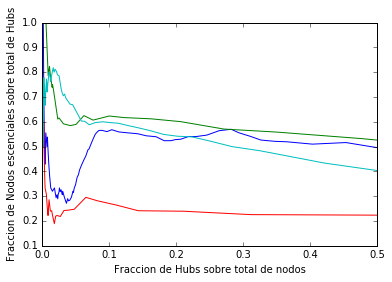

In [6]:
#2) Grafico 3
def asignar_esencialidad(data):
    escen = ldata ('tc02Data/Essential_ORFs_paperHe.txt')
    #data=ldata(archive)
    g = nx.Graph ()
    g = g.to_undirected()

    for i in range (len(data)):
        g.add_nodes_from (data[i])
        g.add_edge (data[i][0],data[i][1])
        
    N=g.number_of_nodes()
    
    k=[]
    for node in g.nodes:
        k.append(g.degree(node))
    
    kM = max(k)
    
    nodos=[]
          
    for node in g.nodes():
        g.node[node]['escencialidad']='no escencial'
        nodos.append([node,'no escencial'])
        h=nodos.index([node,'no escencial'])
        for j in range(len(escen)):

            if len(escen[j]) > 2 and node in escen[j][1]: #No me interesan las listas con largo menor a 2
                g.node[node]['escencialidad']='escencial'
                nodos[h][1]='escencial'
        
    frac_Hubs_total = []
    frac_Escen_Hubs = []
    for k in range(1,kM):#defino el kcutoff
        contadorH = 0
        contadorE = 0
        for node in nodos:
            #K_cutoff.append(0)
            if g.degree(node[0]) > k:
                contadorH = contadorH + 1
                if node[1] == 'escencial':
                    contadorE = contadorE + 1
                    
        frac_Hubs_total.append(contadorH/N)
        
        frac_Escen_Hubs.append(contadorE/contadorH)

    #print(frac_Hubs_total)
    #print(frac_Escen_Hubs)
    plt.plot(frac_Hubs_total,frac_Escen_Hubs)
    plt.xlabel('Fraccion de Hubs sobre total de nodos')
    plt.ylabel('Fraccion de Nodos escenciales sobre total de Hubs')


asignar_esencialidad(APP)
asignar_esencialidad(LITT)
asignar_esencialidad(Y2HH)
asignar_esencialidad(LIT_REGULYYY)

plt.xlim(0,0.5)
plt.ylim(0.1,1)

plt.show()


#dataAPP = asignar_esencialidad(APP)
#dataLIT = asignar_esencialidad(LITT)
#dataY2HH = asignar_esencialidad(Y2HH)
#dataLITREG = asignar_esencialidad(LIT_REGULYYY)

In [7]:
#Analisis de vulnerabilidad
#Figura 3 Zotenko.

#Armo el grafo de cada set de datos.
def grafo (archive):
    data=ldata(archive)
    g = nx.Graph ()
    g = g.to_undirected()

    for i in range (len(data)):
        g.add_nodes_from (data[i])
        g.add_edge (data[i][0],data[i][1])
    return g

#La V es de vulnerabilidad.
V_AP = grafo ('tc02Data/yeast_AP-MS.txt')
V_LIT = grafo ('tc02Data/yeast_LIT.txt')
V_Y2H = grafo ('tc02Data/yeast_Y2H.txt')
V_LIT_REGULY = grafo ('tc02Data/yeast_LIT_Reguly.txt')

#Extraigo la información del grado de cada nodo. En dos listas separadas para identificar al nodo con grado mas alto.
nodos_V_AP = []
grados_V_AP = []
for node in V_AP.nodes:
    nodos_V_AP.append (node)
    grados_V_AP.append (V_AP.degree(node))

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++    
#Remuevo grado
#Modificando el valor central analizado, donde dice comp_gig.degree se pueden analizar eigenvalue y shortest-path.
def impacto_grado (archive):
    x = []
    y = []
    #Tomo la componente gigante de mi grafo. Como criterio se toma el largo (key = len) y tomo el subgrafo con el máximo.
    comp_gig = max (nx.connected_component_subgraphs(archive) , key = len)
    N = int (comp_gig.number_of_nodes())
    i = 0
    while len (comp_gig) > 400: #Modificando el numero podemos determinar hasta cuando va a analizar el largo de la red.
        nodos = [] #Nodos de la componente gigante.
        grados = [] #Grado de ellos.
        for node in  comp_gig.nodes:
            nodos.append (node)
            grados.append (comp_gig.degree(node))
        indice_nodo_grado_mayor = grados.index(max(grados))
        comp_gig.remove_node(nodos[indice_nodo_grado_mayor])
        i = i + 1
        x.append (i/float (N))
        comp_gig = max (nx.connected_component_subgraphs(comp_gig) , key = len)
        y.append(len(comp_gig)/float (N)) #IMPORTANTE:El numerador es el largo NUEVO de la componente gigante y
                                          #el denominador te da el largo antes de la extracción del nodo central.
        
    todo = [x,y]
    return todo
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#REMOVE RANDOM
def impacto_random (archive):
    x = []
    y = []
    #Tomo la componente gigante de mi grafo. Como criterio se toma el largo (key = len) y tomo el subgrafo con el máximo.
    comp_gig = max (nx.connected_component_subgraphs(archive) , key = len)
    N = int (comp_gig.number_of_nodes())
    i = 0
    while len (comp_gig) > 400: #Modificando el numero podemos determinar hasta cuando va a analizar el largo de la red.
        nodos = [] #Nodos de la componente gigante.
        grados = [] #Grado de ellos.
        for node in  comp_gig.nodes:
            nodos.append (node)
            grados.append (comp_gig.degree(node))
        nodo = random.choice(nodos) #elijo nodo aleatoriamente
        comp_gig.remove_nodes_from([nodo])
        i = i + 1
        x.append (i/float (N))
        comp_gig = max (nx.connected_component_subgraphs(comp_gig) , key = len)
        y.append(len(comp_gig)/float (N)) #IMPORTANTE:El numerador es el largo NUEVO de la componente gigante y
                                          #el denominador te da el largo antes de la extracción del nodo central.
        
    todo = [x,y]
    return todo
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#REMOVE ESSENTIAL
def impacto_escencial (archive):
#--------------------------------------asigno escencialidad a los nodos-------------------------------------------------
    escen = ldata ('tc02Data/Essential_ORFs_paperHe.txt') 
    Nodos_de_red_original = []
    Nodos_escenciales_original = []     
    for node in archive.nodes():
        archive.node[node]['escencialidad']='no escencial'
        Nodos_de_red_original.append([node,'no escencial'])
        h=Nodos_de_red_original.index([node,'no escencial'])
        for j in range(len(escen)):
            
            if len(escen[j]) > 2 and node in escen[j][1]: #No me interesan las listas con largo menor a 2
                archive.node[node]['escencialidad']='escencial'
                Nodos_de_red_original[h][1]='escencial'
                Nodos_escenciales_original.append(node)
                
#Creo una lista de nodos escenciales
#-------------------------------------------------------------------------------------------------------------------
    x = []
    y = []
    #Tomo la componente gigante de mi grafo. Como criterio se toma el largo (key = len) y tomo el subgrafo con el máximo.
    comp_gig = max (nx.connected_component_subgraphs(archive) , key = len)
    N = int (comp_gig.number_of_nodes())
    i = 0
    nodos_escenciales = Nodos_escenciales_original
    while len (nodos_escenciales) > 1: #Modificando el numero podemos determinar hasta cuando va a analizar el largo de la red.
        nodos = [] #Nodos de la componente gigante.
        grados = [] #Grado de ellos.
        nodos_escenciales = []
        for node in  comp_gig.nodes:
            nodos.append (node)
            grados.append (comp_gig.degree(node))
            if node in Nodos_escenciales_original:
                nodos_escenciales.append(node)
        nodo = random.choice(nodos_escenciales) #elijo nodo escencial aleatoriamente
        comp_gig.remove_nodes_from([nodo])
        i = i + 1
        x.append (i/float (N))
        comp_gig = max (nx.connected_component_subgraphs(comp_gig) , key = len)
        y.append(len(comp_gig)/float (N)) #IMPORTANTE:El numerador es el largo NUEVO de la componente gigante y
                                              #el denominador te da el largo antes de la extracción del nodo central.
        
    todo = [x,y]
    return todo
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Impacto eigenvector
def impacto_eigenvector (archive):
    x = []
    y = []
    #Tomo la componente gigante de mi grafo. Como criterio se toma el largo (key = len) y tomo el subgrafo con el máximo.
    comp_gig = max (nx.connected_component_subgraphs(archive) , key = len)
    N = int (comp_gig.number_of_nodes())
    i = 0
    while len (comp_gig) > 400: #Modificando el numero podemos determinar hasta cuando va a analizar el largo de la red.
        nodos = [] #Nodos de la componente gigante.
        eigenvector = [] #Grado de ellos.
        for node in  comp_gig.nodes:
            nodos.append (node)
            eigenvector.append (nx.eigenvector_centrality(comp_gig)[node])
        indice_nodo_autovector_mayor = eigenvector.index(max(grados))
        comp_gig.remove_node(nodos[indice_nodo_autovector_mayor])
        i = i + 1
        x.append (i/float (N))
        comp_gig = max (nx.connected_component_subgraphs(comp_gig) , key = len)
        y.append(len(comp_gig)/float (N)) #IMPORTANTE:El numerador es el largo NUEVO de la componente gigante y
                                          #el denominador te da el largo antes de la extracción del nodo central.
        
    todo = [x,y]
    return todo
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Ver el impacto del betweenness.
def impacto_bet (archive):
    x = []
    y = []
    #Tomo la componente gigante de mi grafo. Como criterio se toma el largo (key = len) y tomo el subgrafo con el máximo.
    comp_gig = max (nx.connected_component_subgraphs(archive) , key = len)
    N = int (comp_gig.number_of_nodes())
    i = 0
    #print (nx.betweenness_centrality(comp_gig)["YNL301C"])
    print (len (comp_gig))
    while len (comp_gig) > 970: #Modificando el numero podemos determinar hasta cuando va a analizar el largo de la red.
        nodos = [] #Nodos de la componente gigante.
        bet = [] #Grado de ellos.
        for node in  comp_gig.nodes:
            nodos.append (node)
            #print (nodos)
            #print (bet)
            bet.append (nx.betweenness_centrality(comp_gig)[node])        
        indice_nodo_bet_mayor = bet.index(max(bet))
        comp_gig.remove_node(nodos[indice_nodo_bet_mayor])
        i = i + 1
        x.append (i/float (N))
        comp_gig = max (nx.connected_component_subgraphs(comp_gig) , key = len)
        y.append(len(comp_gig)/float (N)) #IMPORTANTE:El numerador es el largo NUEVO de la componente gigante y
                                          #el denominador te da el largo antes de la extracción del nodo central.
        
    todo = [x,y]
    return todo
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# pruebagrado = impacto_grado (V_AP)

# plt.plot(pruebagrado[0],pruebagrado[1],'r')
# plt.xlabel('Fraccion de nodos extraidos')
# plt.ylabel('Fraccion de nodos que quedan')


# pruebaescencial = impacto_escencial (V_AP)

# plt.plot(pruebaescencial[0],pruebaescencial[1],'b')
# plt.xlabel('Fraccion de nodos extraidos')
# plt.ylabel('Fraccion de nodos que quedan')


# pruebagrado = impacto_random (V_AP)

# plt.plot(pruebagrado[0],pruebagrado[1],'k')
# plt.xlabel('Fraccion de nodos extraidos')
# plt.ylabel('Fraccion de nodos que quedan')

# pruebavector = impacto_eigenvector (V_AP)

# plt.plot(pruebavector[0],pruebavector[1],'k')
# plt.xlabel('Fraccion de nodos extraidos')
# plt.ylabel('Fraccion de nodos que quedan')

# plt.show ()


#Creeria que esta bien, el grafico no me gusta mucho igual.

#Para nodos aleatoriamente esta en la linea de arriba (32).


#gonzauri@gmail.com

#Para la extraccion de proteinas escenciales.

630
1622
[['YGR116W', 1], ['YDR087C', 22], ['YER147C', 1], ['YDL082W', 81], ['YDR064W', 104], ['YGR132C', 5], ['YLR298C', 14], ['YHL011C', 1], ['YDR382W', 56], ['YPL012W', 48], ['YDL045WA', 5], ['YKR085C', 21], ['YKL173W', 50], ['YJL085W', 4], ['YLR148W', 6], ['YPR144C', 37], ['YGR283C', 1], ['YCR095C', 3], ['YBR137W', 1], ['YJL140W', 16], ['YBR136W', 2], ['YLR240W', 2], ['YDR385W', 9], ['YKR083C', 3], ['YNR024W', 5], ['YOR108W', 1], ['YLR002C', 37], ['YOR194C', 1], ['YDR432W', 4], ['YDR473C', 28], ['YDR074W', 3], ['YLR015W', 7], ['YBR084W', 6], ['YMR049C', 34], ['YLR347C', 10], ['YGR220C', 19], ['YML069W', 13], ['YGL123W', 19], ['YDR471W', 82], ['YIL076W', 6], ['YOR132W', 3], ['YGR135W', 14], ['YPL190C', 10], ['YCL011C', 29], ['YGR252W', 20], ['YLR342W', 7], ['YPL011C', 14], ['YBR247C', 26], ['YDR211W', 8], ['YGR250C', 1], ['YFR001W', 13], ['YOL072W', 1], ['YNL262W', 4], ['YPL126W', 39], ['YNL312W', 8], ['YOL005C', 17], ['YIL022W', 1], ['YDR390C', 1], ['YMR314W', 28], ['YGL245W', 5], 

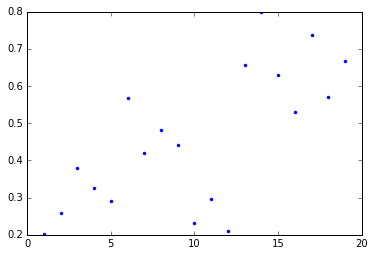

In [8]:
lista_de_nodos_escenciales=[]

escen = ldata ('tc02Data/Essential_ORFs_paperHe.txt')

g = grafo ('tc02Data/yeast_AP-MS.txt')

for node in g.nodes():
    g.node[node]['escencialidad']='no escencial'
    
for node in g.nodes():    
    for j in range(len(escen)):

        if len(escen[j]) > 2 and node in escen[j][1]: #No me interesan las listas con largo menor a 2
            g.node[node]['escencialidad']='escencial'
            lista_de_nodos_escenciales.append(node)
print(len(lista_de_nodos_escenciales))
print(len(list(g.nodes)))

n_g=[]
for node in g.nodes():
    n_g.append([node,g.degree(node)])
print(n_g)
PE=[]


#Se analizaron los nodos hasta grado k = 12 porque para grados mayores hay poca cantidad de nodos.
for k in range(1,20):
    cont=0
    cont_e = 0
    for node in g.nodes:
        if g.degree(node)==k:
            cont=cont+1
            if g.node[node]['escencialidad'] == "escencial":
                cont_e = cont_e + 1
    PE.append([k,cont_e/cont])
PE

x = np.zeros (len(PE))
y = np.zeros (len(PE))

for i in range(len(PE)):
    x[i]=PE[i][0]
    y[i]=PE[i][1]
    
plt.plot(x,y,'.')
plt.show()

In [42]:
#AVANCE-----> BORRAR REPOSITORIO, CLONAR Y DESPUES COPY PASTE ESTO SOBRE REPO
import random
#FIGURA 2.B HE
#CALCULO ALFA
#Para eso, tengo que calcular la distribucion del numero de interacciones entre proteinas escenciales (IBEP) 
# en redes recableadas aleatoriamente. Siendo n el nro de IBEP en la red y N el nro
#total de enlaces en la red, alfa=(n-m)/N

#Agarro la red y la recableo 10000 veces , calculando m en cada recableado
def coef_alfa(g):
    
    #Asigno escencialidad
    nro_escenciales = 0
    escen = ldata ('tc02Data/Essential_ORFs_paperHe.txt')
    for node in g.nodes():
        g.node[node]['escencialidad']='no escencial'
        for j in range(len(escen)):

            if len(escen[j]) > 2 and node in escen[j][1]: #No me interesan las listas con largo menor a 2
                g.node[node]['escencialidad']='escencial'
                nro_escenciales = nro_escenciales + 1
    print(nro_escenciales)
    #Calculo el n de la red original (IBEP)
    n = 0
    for enlace in g.edges():
        if g.node[enlace[0]]['escencialidad'] == 'escencial' and g.node[enlace[1]]['escencialidad'] == 'escencial':
            n = n + 1
    print(len(list(g.edges())))

    #Lista de nodos con grados ordenada de mayor a menor sin nodos con grado cero
    nodo_grados=[]
    for node in g.nodes:
        nodo_grados.append([node,g.degree[node]])
        if g.degree(node) == 0:
            nodo_grados.remove([node,g.degree[node]])
    nodo_grados.sort(key=lambda grado: grado[1], reverse=True)

#     #Probabilidad de que un nodo sea escencial
#     PE=[]
#     grados=[]
#     for k in range(len(nodo_grados)):
#         grados.append(nodo_grados[k][1])
#     print(grados)
#     Kmax=max(grados)
    
#     for k in range(Kmax):
#         sum_k = 0
#         for i in range(len(nodo_grados)):
#             if int(grados[i]) == k and g.node[nodo_grados[i][0]]['escencialidad'] == 'escencial' :
#                 sum_k = sum_k + 1
#         PE.append([k,sum_k/nro_escenciales])
    
#     print(PE)
        
    #Arranca el recableado

    #PASOS A SEGUIR
    #I)   Tengo una lista con los nodos y sus grados
    #II)  agarro el nodo de grado mas alto
    #III) lo voy recableando y redefiniendo grados de sus nodos vecinos (para cada nuevo vecino conectado a este nodo, su grado se reduce en 1)
    #IV)  una vez recableado, rehago la lista de nodos y grados, eliminando a este nodo de la lista, y con los grados del resto redefinidos,
    #     y repito
    
    lista_de_m = []
    
    for _ in range(10):
        nuevos_edges = []
        nodo_grados=[]
        for node in g.nodes:
            nodo_grados.append([node,g.degree[node]])
            if g.degree(node) == 0:
                nodo_grados.remove([node,g.degree[node]])
        nodo_grados.sort(key=lambda grado: grado[1], reverse=True)
        while len(nodo_grados) > 1: #(II)
            while nodo_grados[0][1] > 0:
                nuevo_vecino = random.choice(nodo_grados[1:])
                if [nodo_grados[0][0],nuevo_vecino[0]] not in nuevos_edges: #(III)
                    nuevo_vecino[1] = nuevo_vecino[1] - 1
                    nodo_grados[0][1] = nodo_grados[0][1] - 1
                    nuevos_edges.append([nodo_grados[0][0],nuevo_vecino[0]]) #mi nueva lista de enlaces puede tener menos enlaces que la original, pero no sera significativo
                    if nuevo_vecino[1] == 0:
                        nodo_grados.remove(nuevo_vecino)
            nodo_grados.remove(nodo_grados[0]) #(IV)
            nodo_grados.sort(key=lambda grado: grado[1], reverse=True) #Reordeno la lista con los nodos redefinidos y con los nodos con k = 0 fuera

        #me fijo cuantos enlaces escenciales tengo
        m = 0
        for enlace in nuevos_edges:
            if g.node[enlace[0]]['escencialidad'] == 'escencial' and g.node[enlace[1]]['escencialidad'] == 'escencial':
                m = m + 1
        lista_de_m.append(m)
    
   
    
    m = sum(lista_de_m)/len(lista_de_m)
    
    alfa = ((n-m)/(g.number_of_edges()))*100
    
    
    
    return [alfa,n,m,nro_escenciales] 

def coef_beta(g,n,m,nro_escenciales):
#     PASOS
#     Asigno n-m enlaces aleatorios en la red (notar que es la cantidad de essential PPI)
#     Marco a estos nodos enlazados como escenciales (pues los nodos enlazados por essential PPI son nodos escenciales)
#     Asigno aleatoriamente escencialidad al resto de los nodos hasta llegar a tener n nodos escenciales
#     Rehago el proceso 10000 veces
    nro_de_vueltas = 10
    
    betas = []
    
    for node in g.nodes:
        betas.append([node,g.degree(node),0])
    
    for _ in range(nro_de_vueltas):

        #Lista de nodos con grados ordenada de mayor a menor sin nodos con grado cero
        nodo_grados=[]

        for node in g.nodes:
            nodo_grados.append([node,g.degree[node]])

        random.shuffle(nodo_grados)  

        #Asigno (n-m) enlaces aleatorios y escencialidad a los nodos con esos enlaces

        nuevos_enlaces = []

        i = 0

        while len(nuevos_enlaces) < int(n-m):

            nodo = random.choice(nodo_grados)
            if nodo_grados[i][0] != nodo [0] and [nodo[0],nodo_grados[i][0]] not in nuevos_enlaces:
                nuevos_enlaces.append([nodo_grados[i][0],nodo[0]])
                i = i + 1

        #pongo a los nodos escenciales en una lista

        nodos_escenciales=[]

        for nod in nuevos_enlaces:

            nodos_escenciales.append(nod[0])
            nodos_escenciales.append(nod[1])
        
        nodos_escenciales = list(set(nodos_escenciales))
        #pongo a los nodos  no escenciales en una lista

        no_escenciales=[]

        for node in nodo_grados:
            if node[0] not in nodos_escenciales:
             #   g.node[node[0]]['escencialidad'] = 'no - escencial'
                no_escenciales.append(node[0])

        #Selecciono m nodos aleatoriamente y les asigno escencialidad
        random.shuffle(no_escenciales)
        
        #Creo una lista que contenga a los nodos escenciales debido a factores que no son los enlaces escenciales
        nuevos_escenciales = []
        if len(nodos_escenciales)<nro_escenciales:
            i = 0
            while i < nro_escenciales:
                #g.node[no_escenciales[i]]['escencialidad'] = 'escencial'
                nuevos_escenciales.append(no_escenciales[i])
                i = i + 1


        for i in range(len(betas)): #Beta para cada nodo[i] sera sum(r)/10000

            if betas[i][0] in nuevos_escenciales:
            
                betas[i][2] = betas[i][2] + 1/nro_de_vueltas
                
    print(int(n-m))            
    print(len(nodos_escenciales))
#     print(nodos_escenciales)
    print(len(no_escenciales))
#     print(betas)
    Beta = 0
    for i in range(len(betas)):
        Beta = Beta + betas[i][2]
    Beta = Beta*100/len(betas)
        
    return Beta

def prob_escencial(g):

    PE=[]
    PE2=[]
    
  
    distribucion_de_grado=[]
    grados=[]
    
    for node in g.nodes:
        grados.append(g.degree(node))
    
    for k in range(max(list(grados))):
        r = 0
        for node in g.nodes:
            if g.degree(node) == k:
                r = r + 1
        distribucion_de_grado.append([k,r])
           
    
    #Se analizaron los nodos hasta grado k = 12 porque para grados mayores hay poca cantidad de nodos.
    for k in range(len(distribucion_de_grado)):
        if distribucion_de_grado[k][1]>=20:
            cont_e = 0
            for node in g.nodes:
                if g.degree(node)==k and g.node[node]['escencialidad'] == "escencial":
                        cont_e = cont_e + 1

            PE.append([distribucion_de_grado[k][0],cont_e/distribucion_de_grado[k][1]])

    x = np.zeros (len(PE))
    y = np.zeros (len(PE))

    for i in range(len(PE)):
        x[i]=PE[i][0]
        y[i]=PE[i][1]

    plt.plot(x,np.log(1-y),'.')
    plt.xlabel('Grado del nodo')
    plt.ylabel('Log(1-Pe)')
    plt.show()
    
    return [PE,x,y,distribucion_de_grado]

V_AP = grafo ('tc02Data/yeast_AP-MS.txt')
# V_LIT = grafo ('tc02Data/yeast_LIT.txt')
# V_Y2H = grafo ('tc02Data/yeast_Y2H.txt')
# V_LIT_REGULY = grafo ('tc02Data/yeast_LIT_Reguly.txt')
alfa = coef_alfa(V_Y2H)
print(alfa)
beta=coef_beta(V_Y2H,alfa[1],alfa[2],alfa[3])
print(beta)
# print(coef_alfa(V_Y2H))
# print(coef_alfa(V_LIT_REGULY))    

# V_AP = grafo ('tc02Data/yeast_AP-MS.txt')
# V_LIT = grafo ('tc02Data/yeast_LIT.txt')
# V_Y2H = grafo ('tc02Data/yeast_Y2H.txt')
# V_LIT_REGULY = grafo ('tc02Data/yeast_LIT_Reguly.txt')

# print(coef_alfa(V_AP))
# print(coef_alfa(V_LIT))
# print(coef_alfa(V_Y2H))
# print(coef_alfa(V_LIT_REGULY))

#PARA ALFA OBTENGO MAS NODOS ESCENCIALES EN LA DISTRIBUCION ALEATORIA----->VER PAPER ZOTENKO, NO FUNCIONA ESTE METODO PARA ESTA RED


470
2930
[3.2764505119453924, 276, 180.0, 470]
96
187
1831
23.29038652130831


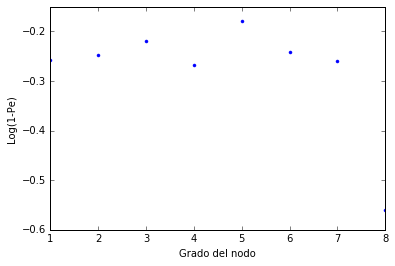

[[[1, 0.2276923076923077],
  [2, 0.21980676328502416],
  [3, 0.19704433497536947],
  [4, 0.23529411764705882],
  [5, 0.16417910447761194],
  [6, 0.21428571428571427],
  [7, 0.22857142857142856],
  [8, 0.42857142857142855]],
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 array([ 0.22769231,  0.21980676,  0.19704433,  0.23529412,  0.1641791 ,
         0.21428571,  0.22857143,  0.42857143])]

In [37]:


prob_escencial(V_Y2H)

470
2930
94
183
1835


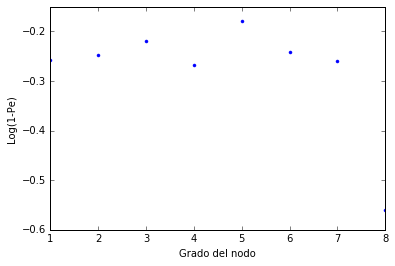

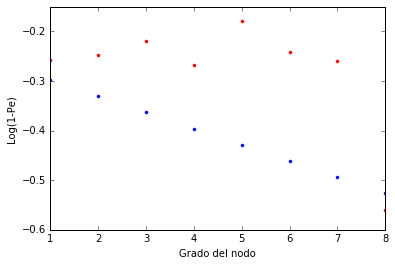

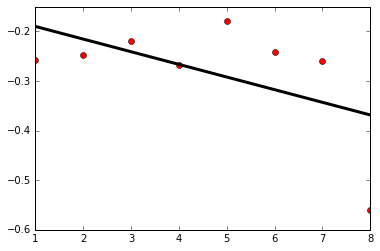

In [59]:
from scipy import optimize
alfa = coef_alfa(V_Y2H)

Beta=coef_beta(V_Y2H,alfa[1],alfa[2],alfa[3])

PE = prob_escencial(V_Y2H)

def graficos_PE(g,PE,alfa,Beta):
    
    plt.plot(PE[1],np.log(1-PE[2]),'r.')
    plt.xlabel('Grado del nodo')
    plt.ylabel('Log(1-Pe)')
    
    
    plt.plot(PE[1],np.log(1-Beta/100)+np.log(1-alfa[0]/100)*PE[1],'b.')
    plt.show()
    
    x=PE[1]
    y=np.log(1-PE[2])
    
    fitfunc = lambda p, x: p[0]*x+p[1] # Funcion con la que queremos fitear la data
    p0 = [-0.2, -0.2] # Parametros iniciales para fitear
    errfunc = lambda p, x, y: fitfunc(p, x) - y # Distancia a la función objetivo
    p1, success = optimize.leastsq(errfunc, p0[:], args=(x, y))
    plt.plot(PE[1], np.log(1-PE[2]), "ro", PE[1], fitfunc(p1, x), "k-", linewidth=3) # Plot of the data and
    
    plt.show()
    
graficos_PE(V_Y2H,PE,alfa,Beta)    
#GRAFICO PE OBTENIDA Y ESTIMADA


630
9070
[127, 110, 104, 103, 98, 89, 87, 86, 85, 84, 84, 84, 83, 82, 81, 81, 80, 79, 77, 76, 76, 75, 75, 75, 75, 74, 74, 74, 74, 74, 73, 73, 72, 72, 71, 71, 70, 70, 69, 68, 68, 67, 66, 66, 65, 65, 64, 63, 62, 61, 60, 60, 60, 58, 56, 56, 56, 54, 54, 53, 53, 53, 52, 52, 51, 51, 51, 50, 50, 49, 49, 48, 48, 48, 48, 47, 46, 46, 45, 45, 45, 44, 44, 44, 44, 43, 43, 43, 42, 42, 41, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 37, 37, 37, 37, 37, 36, 36, 36, 35, 35, 35, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 32, 31, 31, 31, 31, 31, 30, 30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23

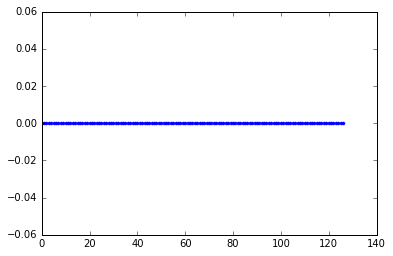

[[0, 0.0], [1, 0.0], [2, 0.0], [3, 0.0], [4, 0.0], [5, 0.0], [6, 0.0], [7, 0.0], [8, 0.0], [9, 0.0], [10, 0.0], [11, 0.0], [12, 0.0], [13, 0.0], [14, 0.0], [15, 0.0], [16, 0.0], [17, 0.0], [18, 0.0], [19, 0.0], [20, 0.0], [21, 0.0], [22, 0.0], [23, 0.0], [24, 0.0], [25, 0.0], [26, 0.0], [27, 0.0], [28, 0.0], [29, 0.0], [30, 0.0], [31, 0.0], [32, 0.0], [33, 0.0], [34, 0.0], [35, 0.0], [36, 0.0], [37, 0.0], [38, 0.0], [39, 0.0], [40, 0.0], [41, 0.0], [42, 0.0], [43, 0.0], [44, 0.0], [45, 0.0], [46, 0.0], [47, 0.0], [48, 0.0], [49, 0.0], [50, 0.0], [51, 0.0], [52, 0.0], [53, 0.0], [54, 0.0], [55, 0.0], [56, 0.0], [57, 0.0], [58, 0.0], [59, 0.0], [60, 0.0], [61, 0.0], [62, 0.0], [63, 0.0], [64, 0.0], [65, 0.0], [66, 0.0], [67, 0.0], [68, 0.0], [69, 0.0], [70, 0.0], [71, 0.0], [72, 0.0], [73, 0.0], [74, 0.0], [75, 0.0], [76, 0.0], [77, 0.0], [78, 0.0], [79, 0.0], [80, 0.0], [81, 0.0], [82, 0.0], [83, 0.0], [84, 0.0], [85, 0.0], [86, 0.0], [87, 0.0], [88, 0.0], [89, 0.0], [90, 0.0], [91, 0.0

In [11]:
#Asigno escencialidad
g = grafo ('tc02Data/yeast_AP-MS.txt')
nro_escenciales = 0
escen = ldata ('tc02Data/Essential_ORFs_paperHe.txt')
for node in g.nodes():
    for j in range(len(escen)):

        if len(escen[j]) > 2 and node in escen[j][1]: #No me interesan las listas con largo menor a 2
            g.node[node]['escencialidad']='escencial'
            nro_escenciales = nro_escenciales + 1
        else:
            g.node[node]['escencialidad'] = 'no escencial'
            
print(nro_escenciales)
#Calculo el n de la red original (IBEP)
n = 0
for enlace in g.edges():
    if g.node[enlace[0]]['escencialidad'] == 'escencial' and g.node[enlace[1]]['escencialidad'] == 'escencial':
        n = n + 1
print(len(list(g.edges())))

#Lista de nodos con grados ordenada de mayor a menor sin nodos con grado cero
nodo_grados=[]
for node in g.nodes:
    nodo_grados.append([node,g.degree[node]])
#     if g.degree(node) == 0:
#         nodo_grados.remove([node,g.degree[node]])
nodo_grados.sort(key=lambda grado: grado[1], reverse=True)
#Probabilidad de que un nodo sea escencial
PE=[]
grados=[]
for k in range(len(nodo_grados)):
    grados.append(nodo_grados[k][1])
print(grados)
Kmax=max(grados)

for k in range(Kmax):
    sum_k = 0
    for i in range(len(nodo_grados)):
        if int(grados[i]) == k and g.node[nodo_grados[i][0]]['escencialidad'] == 'escencial' :
            sum_k = sum_k + 1
    PE.append([k,sum_k/nro_escenciales])

x=np.zeros(len(PE))
y=np.zeros(len(PE))

for i in range(len(x)):
    x[i]=PE[i][0]
    y[i]=PE[i][1]

plt.plot(x,y,'.')
plt.show()
    
print(PE)

In [12]:
data=[['gonza','pablo'],['yoda','obi'],['pancho','obi'],['carlitos','pablo'],['gonza','pancho'],['gonza','carlitos'],['obi','carlitos'],['obi','braulio']]
g = nx.Graph ()
g = g.to_undirected()

for i in range (len(data)):
    g.add_nodes_from (data[i])
    g.add_edge (data[i][0],data[i][1])

caca=[]
for node in data:
    caca.append(node[0])

caca.append('gonza')
print(caca)
print(list(set(caca)))

['gonza', 'yoda', 'pancho', 'carlitos', 'gonza', 'gonza', 'obi', 'obi', 'gonza']
['carlitos', 'yoda', 'gonza', 'obi', 'pancho']


In [13]:
#TABLA 3 DE ZOTENKO
#PASOS
#creo una lista con los nodos escenciales de la componente gigante
#creo una lista con los grados de los nodos escenciales
#remuevo los nodos escenciales de la componente gigante y rearmo el grafo con los nodos restantes
#analizo la nueva componente gigante
#
#elijo de forma aleatoria nodos no escenciales tales que tenga una misma cantidad que escenciales y misma distribucion de grado

### el autovalor de mi matriz de adyacencia tiene asociado un autovector. Las n posiciones de mi autovector me dan la centralidad de cada uno de esos nodos en la red. Entonces, lo que hago es buscar el autovalor mas alto y busco el nodo correspondiente (dentro del autovector asociado) de centralidad mas alta

In [14]:
#Impacto eigenvector
def impacto_eigenvector (archive):
    x = []
    y = []
    #Tomo la componente gigante de mi grafo. Como criterio se toma el largo (key = len) y tomo el subgrafo con el máximo.
    comp_gig = max (nx.connected_component_subgraphs(archive) , key = len)
    N = int (comp_gig.number_of_nodes())
    i = 0
    while len (comp_gig) > 400: #Modificando el numero podemos determinar hasta cuando va a analizar el largo de la red.
        nodos = [] #Nodos de la componente gigante.
        eigenvector = [] #Grado de ellos.
        for node in  comp_gig.nodes:
            nodos.append (node)
            eigenvector.append (nx.eigenvector_centrality(comp_gig)[node])
        indice_nodo_autovector_mayor = eigenvector.index(max(eigenvector))
        comp_gig.remove_node(nodos[indice_nodo_autovector_mayor])
        i = i + 1
        x.append (i/float (N))
        comp_gig = max (nx.connected_component_subgraphs(comp_gig) , key = len)
        y.append(len(comp_gig)/float (N)) #IMPORTANTE:El numerador es el largo NUEVO de la componente gigante y
                                          #el denominador te da el largo antes de la extracción del nodo central.
        
    todo = [x,y]
    return todo
#+++++++++++++++++
# pruebavector = impacto_eigenvector (V_AP)

# plt.plot(pruebavector[0],pruebavector[1],'k')
# plt.xlabel('Fraccion de nodos extraidos')
# plt.ylabel('Fraccion de nodos que quedan')

# plt.show ()

In [15]:
#TABLA 3 ZOTENKO
#REMOVE ESSENTIAL
def impacto_escencial_total (archive):
#--------------------------------------asigno escencialidad a los nodos-------------------------------------------------
    escen = ldata ('tc02Data/Essential_ORFs_paperHe.txt') 
    Nodos_de_red_original = []
    Nodos_escenciales_y_grado = []     
    for node in archive.nodes():
        archive.node[node]['escencialidad']='no escencial'
        Nodos_de_red_original.append([node,'no escencial'])
        h=Nodos_de_red_original.index([node,'no escencial'])
        for j in range(len(escen)):

            if len(escen[j]) > 2 and node in escen[j][1]: #No me interesan las listas con largo menor a 2
                archive.node[node]['escencialidad']='escencial'
                Nodos_de_red_original[h][1]='escencial'
                Nodos_escenciales_y_grado.append([node,archive.degree(node)])#Lista con grados de cada nodo escencial

#-------------------------------------------------------------------------------------------------------------------
    #Aca analizamos el impacto de sacar los nodos escenciales.
    
    comp_gig = max (nx.connected_component_subgraphs(archive) , key = len)
    Ninicial = int (comp_gig.number_of_nodes())
    nodos_escenciales_en_comp_gig = 0
    for node in Nodos_escenciales_y_grado:
        if node[0] in comp_gig.nodes:
            comp_gig.remove_node(node[0])
            nodos_escenciales_en_comp_gig = nodos_escenciales_en_comp_gig + 1
            comp_gig = max (nx.connected_component_subgraphs(comp_gig) , key = len)

    Nfinal = int (comp_gig.number_of_nodes())
    x = nodos_escenciales_en_comp_gig
    y = float (Nfinal)/float (Ninicial)
    
#-------------------------------------------------------------------------------------------------------------------
    #Analizamos el impacto de sacar el mismo numero de nodos no escenciales con el mismo grado que los escenciales.
    
    comp_gig_2 = max (nx.connected_component_subgraphs(archive) , key = len)
    nodos_escenciales = []
    grados_escenciales = []
    for i in range (len(Nodos_escenciales_y_grado)):
        nodos_escenciales.append (Nodos_escenciales_y_grado[i][0])
        grados_escenciales.append (Nodos_escenciales_y_grado[i][1])
    #Primero armo una lista con todos los nodos no escenciales con el mismo grado que los escenciales.
    #Se puede mejorar calculando un promedio del grado de los nodos escenciales y eligiendo nodos con ese grado o cercano.
    nodos_no_escenciales_mismo_grado = []
    for node in Nodos_de_red_original:
        if archive.degree(node[0]) in grados_escenciales and not node[0] in nodos_escenciales:
            nodos_no_escenciales_mismo_grado.append (node[0])
            
    #Ahora elijo aleatoriamente nodos de esta ultima lista (nodos_no...)
    j = 0
    while j <= x:
        nodo_aleatorio = random.choice(nodos_no_escenciales_mismo_grado)
        if nodo_aleatorio in comp_gig_2.nodes:
            comp_gig_2.remove_node(nodo_aleatorio)
            comp_gig_2 = max (nx.connected_component_subgraphs(comp_gig_2) , key = len)
            j = j + 1
    Nfinal_2 = int (comp_gig_2.number_of_nodes())
    y_2 = float (Nfinal_2) / float (Ninicial)
    #Estas dos lineas solo sirven para tener referencias de que las listas construidas tienen largos razonables.
    #lista = [len(nodos_escenciales), len (Nodos_de_red_original), len (Nodos_escenciales_y_grado), len (grados_escenciales), len (nodos_no_escenciales_mismo_grado)]    
    #print (lista)
    #--------------
    todo = [x,y,y_2]
    return todo

V_AP = grafo ('tc02Data/yeast_AP-MS.txt')
V_LIT = grafo ('tc02Data/yeast_LIT.txt')
V_Y2H = grafo ('tc02Data/yeast_Y2H.txt')
V_LIT_REGULY = grafo ('tc02Data/yeast_LIT_Reguly.txt')

prueba1 = impacto_escencial_total(V_AP)
prueba2 = impacto_escencial_total (V_LIT)
prueba3 = impacto_escencial_total (V_Y2H)
prueba4 = impacto_escencial_total (V_LIT_REGULY)



tabla3 = pd.DataFrame ({"No Escenciales aleatorios":[prueba1[2],prueba2[2],prueba3[2],prueba4[2]],
                        "Escenciales":[prueba1[1],prueba2[1],prueba3[1],prueba4[1]],
                        "Redes":["AP_MS","LIT","Y2H","LIT_Reguly"],
                        })
print (tabla3)
print (prueba1)
print (prueba2)
print (prueba3)
print (prueba4)

   Escenciales  No Escenciales aleatorios       Redes
0     0.322709                   0.534861       AP_MS
1     0.277824                   0.535037         LIT
2     0.621736                   0.715847         Y2H
3     0.573201                   0.683933  LIT_Reguly
[357, 0.32270916334661354, 0.5348605577689243]
[341, 0.27782357790601814, 0.5350370981038747]
[292, 0.6217364905889496, 0.7158469945355191]
[814, 0.5732009925558312, 0.6839330024813896]


In [16]:
def pares_compartidos (g):
    lista_de_nodos_escenciales=[]
    escen = ldata ('tc02Data/Essential_ORFs_paperHe.txt')
    g = grafo ('tc02Data/yeast_AP-MS.txt')
    for node in g.nodes():
        g.node[node]['escencialidad']='no escencial'
    for node in g.nodes():    
        for j in range(len(escen)):
            if len(escen[j]) > 2 and node in escen[j][1]: #No me interesan las listas con largo menor a 2
                g.node[node]['escencialidad']='escencial'
                lista_de_nodos_escenciales.append(node)
    nodo_ya_recorrido = []
    N_pares_escen = 0
    N_pares_no_escen = 0
    escen = []
    for node1 in g.nodes:
        for node2 in g.nodes:
            if not node2 in nodo_ya_recorrido:
                if g.has_edge (node1,node2) is False:
                    vec_node_1 = g.neighbors (node1)
                    vec_node_2 = g.neighbors (node2)
                    if len (set(vec_node_1) & set (vec_node_2)) >= 3:
                        if node1 in lista_de_nodos_escenciales and node2 in lista_de_nodos_escenciales:
                            N_pares_escen = N_pares_escen + 1
                        elif not node1 in lista_de_nodos_escenciales and not node2 in lista_de_nodos_escenciales:
                            N_pares_no_escen = N_pares_no_escen + 1
        nodo_ya_recorrido.append (node1)
    x = [N_pares_escen,N_pares_no_escen]
    return x

pares_compartidos (V_AP)

[3334, 3626]

In [17]:
escen = [] #Esta lista va a tener todos los nodos escenciales de la red. FALTA HACERLA
nodo_ya_recorrido = []
N_pares_escen = 0
N_pares_no_escen = 0
for node1 in g.nodes:
    for node2 in g.nodes:
        if not node2 in nodo_ya_recorrido:
            if g.has_edge (node1,node2) is False:
                vec_node_1 = g.neighbors (node1)
                vec_node_2 = g.neighbors (node2)
                if len (set(vec_node_1) & set (vec_node_2)) > =3:
                    inter = list (set(vec_node_1) & set (vec_node_2))
                    escen_inter = []
                    no_escen_inter = []
                    for i in range (len (inter)):
                        if inter[i] in escen:
                            escen_inter.append (inter[i])
                        else:
                            no_escen_inter.append (inter[i])
#Parto del supuesto de que o todos los vecinos son escenciales o todos los vecinos son no escenciales.
                    if escen_inter != [] and node1 in escen and node2 in escen:
                        N_pares_escen = N_pares_escen + 1
                    elif no_escen_inter != [] and not node1 in escen and not node2 in escen:
                        N_pares_no_escen = N_pares_no_escen + 1
    nodo_ya_recorrido.append (node1)
    

SyntaxError: invalid syntax (<ipython-input-17-b9ef58314a86>, line 11)

### 